# Gravitational Waves in General Relativity. VII. Waves from Axi-Symmetric Isolated Systems by Bondi, van der Burg & Metzner
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

PLEASE NOTE:  THE RIEMANN AND WEYL TENSORS CALCULATED HERE DO NOT AGREE WITH  MATHEMATICA NOTEBOOK.  CHECK CONVENTION ON INDICES FOR WHAT IS BEING CALCULATED.  SUSPECT THAT ONE INDEX IS UP THREE ARE DOWN HERE VERSUS ALL DOWN IN MATHEMATICA NOTEBOOK.  LISTED AT BOTTOM OF NOTEBOOK ARE THE TWO CONSTRAINT EQUATIONS AND THE ONE EVOLUTION EQUATION.  THEY HAVE NOT BEEN SOLVED YET.

To Calculate Tensors Associated with Metric 14 that appears in this paper, Bondi's Radiating Metric, please see the Python Notebook of the same name.  This metric also appears on page 295 of D'Inverno's Introducing Einstein's Relativity.  Calculated Tensors are listed as answers to problems in the appendix.  It takes, oh I'm gonna say roughly forever to calculate.  Here we focus on Metric 37.

https://profmcruz.files.wordpress.com/2018/02/livro-introducing-einsteins-relativity-dinverno.pdf

https://royalsocietypublishing.org/doi/abs/10.1098/rspa.1962.0161

In [5]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [6]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [7]:
t,rho,phi,z,dt,drho,dphi,dz,psi,sigma = symbols( 't rho phi z dt drho dphi dz psi sigma' ) 

In [8]:
psi = Function('psi')(rho,z)
psi

In [9]:
sigma = Function('sigma')(rho,z)
sigma

In [10]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [11]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [12]:
lineElement = expand(exp(2*psi)*dt**2 - exp(-2*psi) * ( exp(2*sigma) * ( drho**2 + dz**2 ) + rho**2 * dphi**2))
lineElement

In [13]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅ψ(ρ, z)                                                                   ⎤
⎢ℯ                      0                    0                    0           ⎥
⎢                                                                             ⎥
⎢              -2⋅ψ(ρ, z)  2⋅σ(ρ, z)                                          ⎥
⎢    0       -ℯ          ⋅ℯ                  0                    0           ⎥
⎢                                                                             ⎥
⎢                                       2  -2⋅ψ(ρ, z)                         ⎥
⎢    0                  0             -ρ ⋅ℯ                       0           ⎥
⎢                                                                             ⎥
⎢                                                        -2⋅ψ(ρ, z)  2⋅σ(ρ, z)⎥
⎣    0                  0                    0         -ℯ          ⋅ℯ         ⎦

In [14]:
import sympy

In [15]:
m = sympy.Array(g)
m

⎡ 2⋅ψ(ρ, z)                                                                   ⎤
⎢ℯ                      0                    0                    0           ⎥
⎢                                                                             ⎥
⎢              -2⋅ψ(ρ, z)  2⋅σ(ρ, z)                                          ⎥
⎢    0       -ℯ          ⋅ℯ                  0                    0           ⎥
⎢                                                                             ⎥
⎢                                       2  -2⋅ψ(ρ, z)                         ⎥
⎢    0                  0             -ρ ⋅ℯ                       0           ⎥
⎢                                                                             ⎥
⎢                                                        -2⋅ψ(ρ, z)  2⋅σ(ρ, z)⎥
⎣    0                  0                    0         -ℯ          ⋅ℯ         ⎦

In [16]:
from einsteinpy.symbolic import *

In [17]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                            ⎡ 4⋅ψ(ρ, z) - 2⋅σ(ρ, z) ∂                                                     
⎢⎡             ∂               ∂          ⎤  ⎢ℯ                     ⋅──(ψ(ρ, z))               0                           
⎢⎢     0       ──(ψ(ρ, z))  0  ──(ψ(ρ, z))⎥  ⎢                       ∂ρ                                                    
⎢⎢             ∂ρ              ∂z         ⎥  ⎢                                                                             
⎢⎢                                        ⎥  ⎢                                      ∂             ∂                        
⎢⎢∂                                       ⎥  ⎢                0                   - ──(ψ(ρ, z)) + ──(σ(ρ, z))              
⎢⎢──(ψ(ρ, z))       0       0       0     ⎥  ⎢                                      ∂ρ            ∂ρ                       
⎢⎢∂ρ                                      ⎥  ⎢                                                                             
⎢⎢      

In [20]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡⎛    2                2                       ⎞                                                                           
⎢⎜   ∂                ∂             ∂          ⎟  4⋅ψ(ρ, z) - 2⋅σ(ρ, z)                                                    
⎢⎜ρ⋅───(ψ(ρ, z)) + ρ⋅───(ψ(ρ, z)) + ──(ψ(ρ, z))⎟⋅ℯ                                                                         
⎢⎜    2                2            ∂ρ         ⎟                                                                           
⎢⎝  ∂ρ               ∂z                        ⎠                                                                           
⎢──────────────────────────────────────────────────────────────────────                                                    
⎢                                  ρ                                                                                       
⎢                                                                                                                          
⎢       

In [21]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡⎛                 2           2                           2           2                2                2                 
⎢⎜    ⎛∂          ⎞           ∂               ⎛∂          ⎞           ∂                ∂                ∂                 ∂
⎢⎜- ρ⋅⎜──(ψ(ρ, z))⎟  + 2.0⋅ρ⋅───(ψ(ρ, z)) - ρ⋅⎜──(ψ(ρ, z))⎟  + 2.0⋅ρ⋅───(ψ(ρ, z)) - ρ⋅───(σ(ρ, z)) - ρ⋅───(σ(ρ, z)) + 2.0⋅─
⎢⎜    ⎝∂ρ         ⎠            2              ⎝∂z         ⎠            2                2                2                ∂
⎢⎝                           ∂ρ                                      ∂z               ∂ρ               ∂z                  
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                             ρ                                            
⎢                                                                                                                          
⎢       

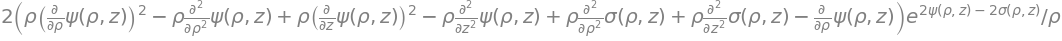

In [22]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [23]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
simplify(rm1.tensor())

⎡                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢       

In [24]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢       

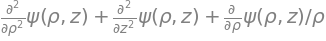

In [31]:
equation38 = expand((1/rho)*Ric.tensor()[0,0].args[1])
equation38

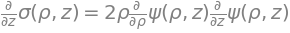

In [37]:
equation38a1 = Eq(diff(sigma,z),solve( simplify(Ric.tensor())[3,1] , diff(sigma,z) )[0] )
equation38a1

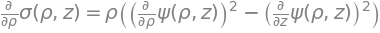

In [38]:
equation38a2 = Eq(diff(sigma,rho) ,solve( simplify(einst.tensor())[1,1] , diff(sigma,rho) )[0])
equation38a2

In [40]:
fieldEquations = Matrix([equation38,equation38a1,equation38a2])
fieldEquations

⎡                                  ∂              ⎤
⎢      2              2            ──(ψ(ρ, z))    ⎥
⎢     ∂              ∂             ∂ρ             ⎥
⎢    ───(ψ(ρ, z)) + ───(ψ(ρ, z)) + ───────────    ⎥
⎢      2              2                 ρ         ⎥
⎢    ∂ρ             ∂z                            ⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(σ(ρ, z)) = 2⋅ρ⋅──(ψ(ρ, z))⋅──(ψ(ρ, z))    ⎥
⎢    ∂z                ∂ρ          ∂z             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(σ(ρ, z)) = ρ⋅⎜⎜──(ψ(ρ, z))⎟  - ⎜──(ψ(ρ, z))⎟ ⎟⎥
⎣∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂z         ⎠ ⎠⎦